Here you can use MNIST dataset [[link](http://yann.lecun.com/exdb/mnist/)] to learn how convolution works.

In [ ]:
#Import pytorch and download data
import torch
import torch.nn as nn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from IPython.display import display, clear_output

transform = transforms.Compose([transforms.Resize((8, 8)),
                                 transforms.ToTensor()])

mnist = datasets.MNIST('', train=True, transform=transform, target_transform=None, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [ ]:
#This is helper function to format text on the grid
def text_axes(ax, data, threshold, fontsize = 12, change_color_text = False):
        size_x, size_y = data.shape
        for i in range(size_x):
            for j in range(size_y):
                v = data[i, j].data.item()

                if change_color_text:
                    if v <= threshold:
                        c = 'black'
                    else:
                        c = 'w'
                else:
                    c = 'black'

                fontweight="bold"
                ax.text(j, i, format(v, '.1f'), fontsize = fontsize,
                        fontweight=fontweight,
                       ha="center", va="center", color=c, )

We will use **scipy.signal** library to obtain results of convolution. You can see documentation [here](https://docs.scipy.org/doc/scipy/reference/signal.html).

To try convolution (technically, cross-correlation) with Pytorch, use *nn.functional.conv2d*.



```
nn.functional.conv2d(data, kernel, bias, stride, padding)
```



In [ ]:
import scipy.signal

Let's take a look on the sample.

We will use **4** from MNIST since it's look good in smaller resolution, you can change resolution in the cell above.


In [ ]:
mnist[2][0].size()

torch.Size([1, 8, 8])

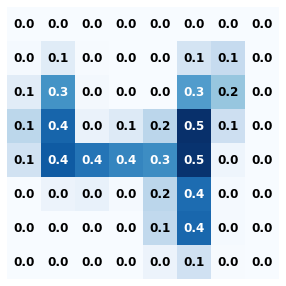

In [ ]:
four = mnist[2][0].squeeze()
fig, ax = plt.subplots(1, 1, figsize=(5,5))

plt.axis('off')
plt.imshow(four, cmap='Blues')
text_axes(ax, four, 0.3, fontsize=12, change_color_text = True)

# Convolution & Cross-correlation

First, let's take a look on the difference between cross-correlation and convolution. We will test two kernels, one is symmetrical and another one is not.


$s = \begin{pmatrix}
  0 & -1 & 0\\
  -1 & 5 & -1\\
  0 & -1 & 0
\end{pmatrix}$ and $ n = \begin{pmatrix}
  -2 & -1 & 1 \\
  -1 & 1 & 1 \\
  0 & 1 & 2
\end{pmatrix}
$


In [ ]:
symm_kernel = [[0,-1,0], [-1,5,-1], [0,-1,0]]
no_symm_kernel = [[-2,-1,1], [-1,1,1], [0,1,2]]

Let's setup widget and plot. You can add your own kernel to options for dropdown.

In [ ]:
import ipywidgets as widgets

In [ ]:
dropdown = widgets.Dropdown(
    options=[('Sharpen [Symmetric kernel]', symm_kernel),
             ('Emboss [Non-symmetric]', no_symm_kernel)],
    value=symm_kernel,
    description='Kernel:',
)

output = widgets.Output()

def draw_grid(ax, title, data):
    ax.axis('off')
    ax.imshow(data, cmap='Blues', vmin=0, vmax=1)
    text_axes(ax, data, 0.3, fontsize = 12, change_color_text = True)
    ax.set_title(title, fontsize = 16, )


For symmetrical kernel results of convolution and cross-correlation are identical.

In [ ]:
display(dropdown, output)

def on_dropdown_change(d):
  if d['type'] == 'change' and d['name'] == 'value':
    with output:
        output.clear_output()
        conv = scipy.signal.convolve2d(four, dropdown.value, 'valid')
        corr = scipy.signal.correlate2d(four, dropdown.value, 'valid')

        fig, axs = plt.subplots(1, 3, figsize=(15,5))
        draw_grid(axs[0], 'Original', four)
        draw_grid(axs[1], 'Convolution', torch.tensor(conv))
        draw_grid(axs[2], 'Cross-correlation', torch.tensor(corr))

        plt.show()

dropdown.observe(on_dropdown_change)

with output:
    conv = scipy.signal.convolve2d(four, dropdown.value, 'valid')
    corr = scipy.signal.correlate2d(four, dropdown.value, 'valid')

    fig, axs = plt.subplots(1, 3, figsize=(15,5))
    draw_grid(axs[0], 'Original', four)
    draw_grid(axs[1], 'Convolution', torch.tensor(conv))
    draw_grid(axs[2], 'Cross-correlation', torch.tensor(corr))

    plt.show()

Dropdown(description='Kernel:', options=(('Sharpen [Symmetric kernel]', [[0, -1, 0], [-1, 5, -1], [0, -1, 0]])…

Output()

# Cross-correlation results

Let's use bigger images to see on cross-correlation results with different kernels.

In [ ]:
transform = transforms.Compose([transforms.Resize((10, 10)),
                                 transforms.ToTensor()])

mnist_large = datasets.MNIST('', train=True, transform=transform, target_transform=None, download=True)
four_large = mnist_large[2][0].squeeze()

You can add your kernels here.
For example, try to detect horizontal edges by using this kernel:

$k = \begin{pmatrix}
  1 & 1 & 1 \\
  0 & 0 & 0 \\
  -1 & -1 & -1
\end{pmatrix}$

```
('Horizontal edges', [[1,1,1], [0,0,0], [-1,-1,-1]])
```



In [ ]:
dropdown_corr = widgets.Dropdown(
    options=[('Gaussian blur', [[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16] ]),
             ('Vertical edges', [[1,0,-1], [1,0,-1], [1,0,-1]]),
              #Put your kernels here
             ],
    value=[[1,0,-1], [1,0,-1], [1,0,-1]],
    description='Kernel:',
)

output_corr = widgets.Output()

In [ ]:
display(dropdown_corr, output_corr)

def on_dropdown_change(d):
  if d['type'] == 'change' and d['name'] == 'value':
    with output_corr:
        clear_output()
        corr = scipy.signal.correlate2d(four_large, dropdown_corr.value, 'valid', )

        fig, axs = plt.subplots(1, 2, figsize=(10,5))
        draw_grid(axs[0], 'Original', four_large)
        draw_grid(axs[1], 'Convolution', torch.tensor(corr))

        plt.show()

dropdown_corr.observe(on_dropdown_change, names='value')

with output_corr:
    output_corr.clear_output()
    corr = scipy.signal.correlate2d(four_large, dropdown_corr.value, 'valid')

    fig, axs = plt.subplots(1, 2, figsize=(10,5))
    draw_grid(axs[0], 'Original', four_large)
    draw_grid(axs[1], 'Convolution', torch.tensor(corr))

    plt.show()

Dropdown(description='Kernel:', index=1, options=(('Gaussian blur', [[0.0625, 0.125, 0.0625], [0.125, 0.25, 0.…

Output()